# Viés e consistência de estimadores
### SME0221 Inferência Estatística

por **Cibele Russo**

**ICMC/USP - São Carlos SP**





# Propriedades dos Estimadores


## Estimador Não Viesado

A primeira propriedade que discutiremos é o **viés** do estimador. Um estimador $ \hat{\theta} $ é dito **não viesado** para estimar um parâmetro $ \theta $ se o seu valor esperado for igual ao próprio parâmetro:

$
E[\hat{\theta}] = \theta
$

Ou seja, um estimador é não viesado se, em média, ele não tende a superestimar nem subestimar o valor verdadeiro do parâmetro.

## Viés do Estimador

Se um estimador $ \hat{\theta} $ não satisfaz a condição anterior, dizemos que ele possui um **viés**, definido como:

$
b(\hat{\theta}) = E[\hat{\theta}] - \theta
$

Se $ b(\hat{\theta}) = 0 $, então $ \hat{\theta} $ é um estimador não viesado. Caso contrário, o estimador apresenta um viés sistemático na estimativa do parâmetro $ \theta $.

## Consistência do Estimador

Outra propriedade importante é a **consistência**. Para definir essa propriedade, consideramos uma sequência de estimadores $ \hat{\theta}_n $ que varia com o tamanho da amostra $ n $. Queremos entender o comportamento do estimador quando $ n $ cresce.

Um estimador $ \hat{\theta}_n $ é **consistente** se, para qualquer $ \varepsilon > 0 $, a seguinte probabilidade tende a zero conforme $ n $ cresce:

$
P(|\hat{\theta}_n - \theta| \geq \varepsilon) \to 0 \text{ quando } n \to \infty
$

Isso significa que, à medida que aumentamos o tamanho da amostra, o estimador se aproxima do verdadeiro valor do parâmetro.

## Critério Prático para Consistência

Para verificar a consistência de um estimador na prática, podemos utilizar a seguinte proposição:

Um estimador $ \hat{\theta}_n $ é consistente se satisfaz simultaneamente as seguintes condições:

1. O valor esperado converge para o verdadeiro parâmetro:

   $
   \lim_{n \to \infty} E[\hat{\theta}_n] = \theta
   $

   Ou seja, no limite, o estimador não é viesado.

2. A variância do estimador tende a zero:

   $
   \lim_{n \to \infty} Var(\hat{\theta}_n) = 0
   $

   Isso garante que, conforme $ n $ cresce, a dispersão do estimador diminui e ele se concentra em torno de $ \theta $.

Se essas duas condições forem satisfeitas, então $ \hat{\theta}_n $ é um estimador consistente para $ \theta $.


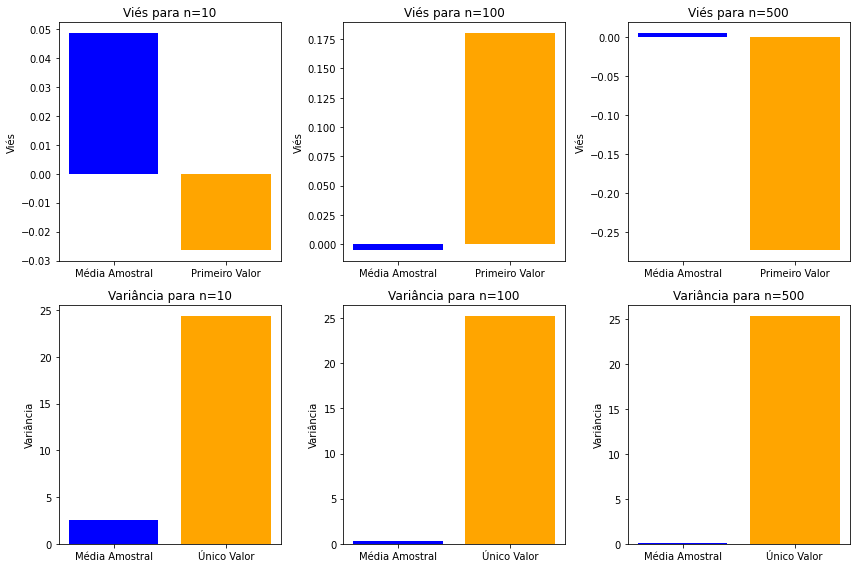

In [2]:
# Ilustrando o viés e consistência de estimadores via simulação

import numpy as np
import matplotlib.pyplot as plt

# fixando a semente
np.random.seed(123)

# Vamos simular amostras de distribuição normal
mu = 0    # média populacional
sigma = 5 # desvio padrão populacional
n_simulations = 1000  # número de simulações
n_values = [10, 100, 500]  # diferentes tamanhos de amostra

# Função para simular e calcular os estimadores
def simula_estimadores(n, n_simulations):
    media_amostral = np.zeros(n_simulations)
    primeiro_valor = np.zeros(n_simulations)

    for i in range(n_simulations):
        amostra = np.random.normal(mu, sigma, n)
        media_amostral[i] = np.mean(amostra)
        primeiro_valor[i] = amostra[0]

    return media_amostral, primeiro_valor

# Gráficos de viés e consistência
plt.figure(figsize=(12, 8))

# Para diferentes tamanhos de amostra
for n in n_values:
    # Simulando os estimadores
    media_amostral, primeiro_valor = simula_estimadores(n, n_simulations)

    # Calculando o viés dos estimadores
    viés_media_amostral = np.mean(media_amostral) - mu
    viés_primeiro_valor = np.mean(primeiro_valor) - mu

    # Gráfico de viés
    plt.subplot(2, len(n_values), n_values.index(n) + 1)
    plt.bar(['Média Amostral', 'Primeiro Valor'], [viés_media_amostral, viés_primeiro_valor], color=['blue', 'orange'])
    plt.title(f'Viés para n={n}')
    plt.ylabel('Viés')

    # Variância (para testar consistência)
    var_media_amostral = np.var(media_amostral)
    var_primeiro_valor = np.var(primeiro_valor)

    # Gráfico de variância
    plt.subplot(2, len(n_values), len(n_values) + n_values.index(n) + 1)
    plt.bar(['Média Amostral', 'Único Valor'], [var_media_amostral, var_primeiro_valor], color=['blue', 'orange'])
    plt.title(f'Variância para n={n}')
    plt.ylabel('Variância')

plt.tight_layout()
plt.show()
